In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ng = pd.read_csv('../data/raw/DATASET_NG.csv', sep=';', decimal=',')
ng.head()

,target,index,V1_AC_down,V1_vib_down,V2_AC_down,V2_vib_down,V3_AC_down,V3_vib_down,V4_AC_down,V4_vib_down,...,G31_vib_up,G32_AC_up,G32_vib_up,G33_AC_up,G33_vib_up,moyenne,ecartype,mediane,min,max
0,1,1A_collecteur,18.059,1.7549,23.258,0.054696,24.411,0.073315,24.556,0.023083,...,0.22268,18.273,0.19721,13.893,0.16130,15.548091,16.375002,8.20445,0.009140,54.300
1,1,1Commutation_1A,24.788,1.0266,24.240,0.060274,25.363,0.228840,28.852,0.066395,...,0.73023,27.088,0.65601,27.403,0.59869,18.914999,19.618546,12.06185,0.007194,60.633
2,1,1Commutation_1B,31.797,1.9960,17.659,0.112720,25.558,0.223920,22.338,0.052203,...,1.03210,30.419,0.64470,29.423,0.51224,18.493557,19.322199,8.79515,0.012683,61.148
3,1,1Commutation_2A,23.514,1.1984,22.292,0.053088,18.340,0.179200,29.437,0.050800,...,0.66900,23.974,0.63761,24.417,0.55020,16.281199,17.032990,10.84515,0.006962,54.817
4,1,1Commutation_2B,31.950,2.9795,20.932,0.082745,26.923,0.186930,28.496,0.154810,...,0.60801,26.281,0.60394,24.258,0.44906,15.904919,16.740977,7.80275,0.007919,56.816


In [24]:
go_ng = pd.read_csv('../data/raw/DATASET_GO_NG.csv', sep=';', decimal=',')
go_ng.head()

C:\Users\ludov\AppData\Local\Temp\ipykernel_19800\342096724.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  go_ng = pd.read_csv('../data/raw/DATASET_GO_NG.csv', sep=';', decimal=',')


,target,index,V1_AC_down,V1_vib_down,V2_AC_down,V2_vib_down,V3_AC_down,V3_vib_down,V4_AC_down,V4_vib_down,...,G31_vib_up,G32_AC_up,G32_vib_up,G33_AC_up,G33_vib_up,moyenne,ecartype,mediane,min,max
0,NaN,750_0,33.985,1.4558,27.088,0.149830,22.814,0.330810,28.660,0.210320,...,0.86359,22.814,0.65178,19.763,0.37262,15.131717,15.968714,10.55745,0.008493,54.922
1,NaN,750_1,26.445,1.6559,27.608,0.038508,28.860,0.253790,33.310,0.082478,...,0.62590,20.715,0.46266,20.247,0.32701,15.787181,16.605664,10.42020,0.007299,54.951
2,NaN,750_2,31.262,1.5694,28.779,0.229520,29.002,0.080115,31.623,0.180230,...,0.57426,19.045,0.41733,16.164,0.27086,15.100836,15.849055,9.53260,0.006897,49.145
3,NaN,750_3,35.562,1.8337,25.714,0.224820,16.012,0.153080,28.863,0.129960,...,0.89115,20.198,0.63790,19.601,0.42571,15.932369,16.680931,11.35560,0.008831,57.127
4,NaN,750_4,30.504,1.2845,27.736,0.140020,20.184,0.152570,26.669,0.078495,...,0.65520,21.148,0.52463,18.314,0.39370,15.250611,16.072722,10.00780,0.009096,52.432


In [12]:
ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Columns: 439 entries, target to max
dtypes: float64(437), int64(1), object(1)
memory usage: 1.6+ MB


In [13]:
go_ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51562 entries, 0 to 51561
Columns: 439 entries, target to max
dtypes: float64(437), object(2)
memory usage: 172.7+ MB


<Axes: xlabel='target'>

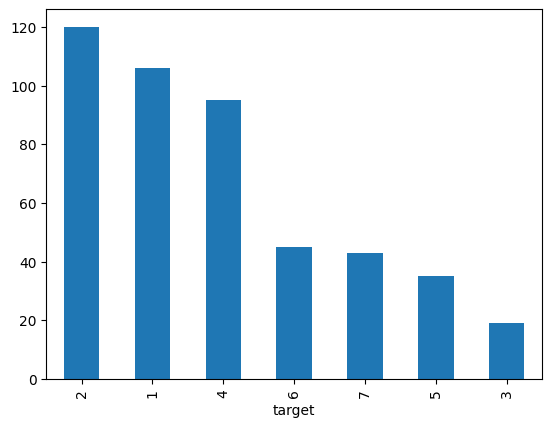

In [14]:
ng['target'].value_counts().plot.bar()

<Axes: xlabel='target'>

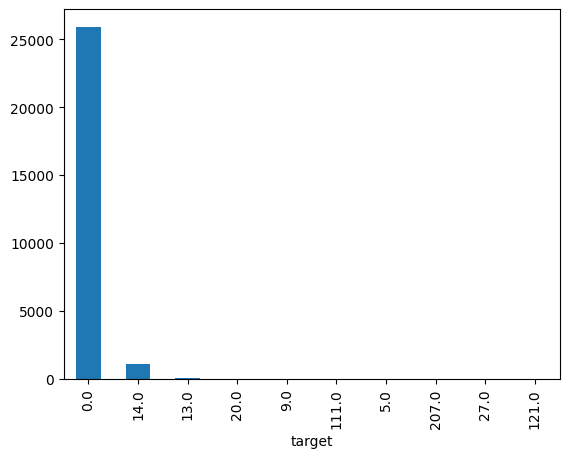

In [25]:
go_ng['target'].value_counts().plot.bar()

In [15]:
len(go_ng)

51562

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 45606 to 45812
Columns: 439 entries, target to max
dtypes: float64(437), object(2)
memory usage: 1.6+ MB


In [53]:
tmp = go_ng['target'].astype(float).dropna().astype(int)
success = go_ng.loc[tmp[tmp == 0].index].sample(len(ng)).copy()
success['target'] = success['target'].astype(float).astype(int)
df_train = go_ng.drop(success.index, axis=0)
df_test = pd.concat([ng, success], axis=0, ignore_index=True).sample(frac=1)
df_test.loc[df_test['target'] != 0, 'target'] = 1

<Axes: xlabel='target'>

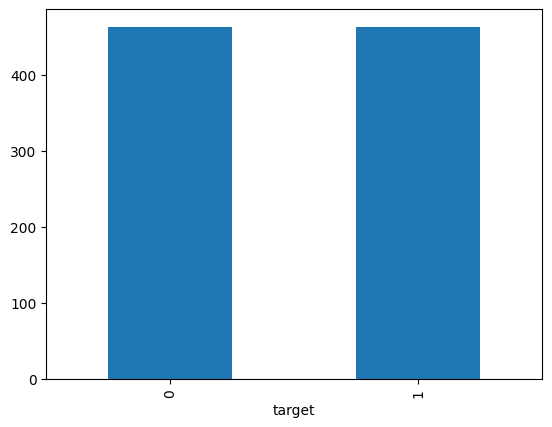

In [54]:
df_test['target'].value_counts().plot.bar()

In [55]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.covariance import EllipticEnvelope
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, average_precision_score, precision_score,recall_score,f1_score,roc_curve


In [56]:
X_test, y_test = df_test.drop('target', axis=1), df_test['target'].copy()
X_train, y_train = df_train.drop('target', axis=1), df_train['target']

In [57]:
import mlflow
import dagshub
dagshub.init(repo_owner='crotelius77', repo_name='MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques', mlflow=True)

mlflow.set_tracking_uri("https://dagshub.com/crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques.mlflow")
mlflow.autolog()
mlflow.set_experiment("ludovic_models")


Accessing as ludovic.andrieux23

Initialized MLflow to track repo 
"crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques"

Repository crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques initialized!

2024/11/20 21:18:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/11/20 21:18:54 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


<Experiment: artifact_location='mlflow-artifacts:/f93c4e7f3cd447fcb30e4a83f6eb400f', creation_time=1731961184437, experiment_id='3', last_update_time=1731961184437, lifecycle_stage='active', name='ludovic_models', tags={}>

In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 727 to 826
Columns: 438 entries, index to max
dtypes: float64(437), object(1)
memory usage: 3.1+ MB


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51099 entries, 0 to 51561
Columns: 438 entries, index to max
dtypes: float64(437), object(1)
memory usage: 171.1+ MB


In [63]:
i = 0

In [62]:
prep = ColumnTransformer([
    ('scaler', StandardScaler(), X_train.select_dtypes(float).columns.to_list()),
], remainder='drop')

pca = Pipeline([
    ('prep', prep),
    ('red', PCA(n_components=10)),
])


In [64]:
i += 1
run_prep = f'preprocessing_{i}'
with mlflow.start_run(run_name=run_prep):
    X_train_scaled = pca.fit_transform(X_train)
    X_test_scaled = pca.transform(X_test)

2024/11/20 21:21:55 WARNING mlflow.utils: Truncated the value of the key `prep__transformers`. Truncated value: `[('scaler', StandardScaler(), ['V1_AC_down', 'V1_vib_down', 'V2_AC_down', 'V2_vib_down', 'V3_AC_down', 'V3_vib_down', 'V4_AC_down', 'V4_vib_down', 'V5_AC_down', 'V5_vib_down', 'V6_AC_down', 'V6_vib_down', 'V7_AC_down', 'V7_vib_down', 'V8_AC_down', 'V8_vib_down', 'V9_AC_down', 'V9_vib_down', 'V10_AC_down', 'V10_vib_down', 'V11_AC_down', 'V11_vib_down', 'V12_AC_down', 'V12_vib_down', 'V13_AC_down', 'V13_vib_down', 'V14_AC_down', 'V14_vib_down', 'V15_AC_down', 'V15_vib_down', 'V16_AC_down', 'V16_vib_down', 'V17_AC_down', 'V17_vib_down', 'V18_AC_down', 'V18_vib_down', 'V19_AC_down', 'V19_vib_down', 'V20_AC_down', 'V20_vib_down', 'V21_AC_down', 'V21_vib_down', 'V22_AC_down', 'V22_vib_down', 'V23_AC_down', 'V23_vib_down', 'V24_AC_down', 'V24_vib_down', 'V25_AC_down', 'V25_vib_down', 'V26_AC_down', 'V26_vib_down', 'V27_AC_down', 'V27_vib_down', 'V28_AC_down', 'V28_vib_down', 'V29_A

In [65]:
pca.named_steps['red'].n_components_**2

100

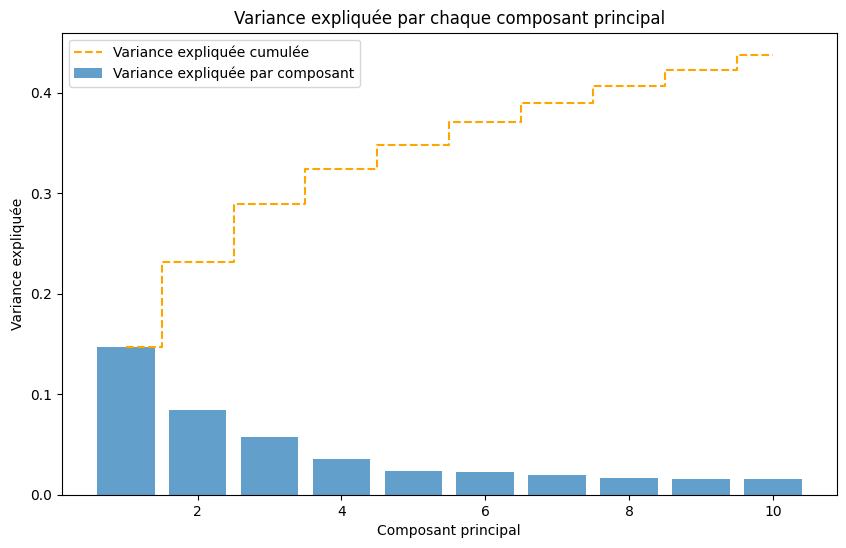

In [66]:
explained_variance = pca.named_steps['red'].explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance expliquée par composant')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', linestyle='--', color='orange', label='Variance expliquée cumulée')
plt.xlabel('Composant principal')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par chaque composant principal')
plt.legend()
plt.show()

In [67]:
artifact_path = 'ee_ludovic'
def launch_model(class_, params, name):
    with mlflow.start_run(run_name=name, nested=False,  tags={"project": "Anomalie_classification", "model": "EllipticEnvelope","Data":"DATASET_GO_NG.csv without nan"}) as run :
            
            # Instanciation de l'algo LOF de base
            model = class_(**params)
            
            # Training sans réduction de dimension
            model.fit(X_train_scaled)

            # Prédiction sur l'ensemble de training
            y_pred = model.predict(X_train_scaled)
            y_pred[y_pred == 1] = 0
            y_pred[y_pred == -1] = 1
            
            # Vision de la classification
            df_pred = pd.DataFrame({"y_pred":y_pred})
            print("Vision inliers_outliers sur données d'entrainement \n",df_pred.y_pred.value_counts(normalize=True))
            
            training_inliers = 100 * df_pred.y_pred.value_counts(normalize=True)[0]
            training_outliers = 100 * df_pred.y_pred.value_counts(normalize=True)[1]
            
            # Inférence du modèle sur les données de validation provenant du dataset_validation (concaténation défauts/sans défauts)
            y_inf = model.predict(X_test_scaled)
            y_inf[y_inf == 1] = 0 # on remplace la valeur des inliers par 0
            y_inf[y_inf == -1] = 1 # on remplace la valeur des outliers par 1
            
            # Visualisation des métriques
            n_errors = (y_inf!=y_test.values).sum()
            print("Nombre d'erreurs : ",n_errors,"\n")
            
            accuracy = 100*accuracy_score(y_test.values,y_inf)
            print(f'Accuracy : {accuracy:.2f} %')
            
            # affichage du ROC-AUC score
            rocauc_score = 100 * roc_auc_score(y_test,y_inf)
            print(f'Score ROC-AUC : {rocauc_score:.2f} %')

            # affichage du MCC score
            mcc_score = matthews_corrcoef(y_test,y_inf)
            print(f'Score MCC : {mcc_score}')

            print("Rapport de classification : \n",classification_report(y_test.values,y_inf),"\n")

            precision = 100 * precision_score(y_test.values,y_inf)
            recall = 100 * recall_score(y_test.values,y_inf)
            f1score = 100 * f1_score(y_test.values,y_inf)


            cm = confusion_matrix(y_test.values, y_pred=y_inf)

            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = cm[1, 1]
            FP = cm[0, 1]

            FN_rate = 100 * (FN / (FN + TP))     
            FP_rate = 100 * (FP / (FP + TN))     
            Sensibility = 100 * (TP / (TP + FN)) 
            Specificity = 100 * (TN / (TN + FP))

            # FN_rate = 100 * (cm[1][0] / (cm[1][0]+cm[1][1]))     #  FN  / (FN + TP)
            # FP_rate = 100 * (cm[0][1] / (cm[0][1]+cm[0][0]))     #  FP  / (FP + TN)
            # Sensibility = 100 * (cm[1][1] / (cm[1][1]+cm[1][0])) #  TP  / (TP + FN)
            # Specificity = 100 * (cm[0][0] / (cm[1][1]+cm[0][0])) #  TN  / (TP + FN)   !!!


            matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
            print("Matrice de confusion : \n")
            figure = matrix.plot()
            
            metrics ={  "dataset_detected_inliers":training_inliers,
                        "dataset_detected_outliers":training_outliers,
                        "nb_erreurs_prediction":n_errors,
                        "Accuracy":accuracy,
                        "Score ROC-AUC":rocauc_score,
                        "Score MCC":mcc_score,
                        "Recall":recall,
                        "F1-score":f1score,
                        "Sensibility":Sensibility,
                        "Specificity":Specificity,
                        "Precision":precision,
                        "FN_rate":FN_rate,
                        "FP_rate":FP_rate}
            
            mlflow.log_params(params)
            mlflow.log_metrics(metrics)
            #mlflow.log_figure(figure, "Confusion_Matrix.png")
            mlflow.sklearn.log_model(sk_model=model,input_example=X_test_scaled,artifact_path=artifact_path)

2024/11/20 21:32:15 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  235 

Accuracy : 74.62 %
Score ROC-AUC : 74.62 %
Score MCC : 0.5560247962810296
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       463
           1       0.96      0.51      0.67       463

    accuracy                           0.75       926
   macro avg       0.81      0.75      0.73       926
weighted avg       0.81      0.75      0.73       926
 

Matrice de confusion : 



2024/11/20 21:32:41 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  201 

Accuracy : 78.29 %
Score ROC-AUC : 78.29 %
Score MCC : 0.62119501960618
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       463
           1       0.98      0.58      0.73       463

    accuracy                           0.78       926
   macro avg       0.84      0.78      0.77       926
weighted avg       0.84      0.78      0.77       926
 

Matrice de confusion : 



2024/11/20 21:33:11 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  205 

Accuracy : 77.86 %
Score ROC-AUC : 77.86 %
Score MCC : 0.6143832431764273
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       463
           1       0.98      0.57      0.72       463

    accuracy                           0.78       926
   macro avg       0.84      0.78      0.77       926
weighted avg       0.84      0.78      0.77       926
 

Matrice de confusion : 



2024/11/20 21:33:38 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  205 

Accuracy : 77.86 %
Score ROC-AUC : 77.86 %
Score MCC : 0.6143832431764273
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       463
           1       0.98      0.57      0.72       463

    accuracy                           0.78       926
   macro avg       0.84      0.78      0.77       926
weighted avg       0.84      0.78      0.77       926
 

Matrice de confusion : 



2024/11/20 21:34:04 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  236 

Accuracy : 74.51 %
Score ROC-AUC : 74.51 %
Score MCC : 0.5528812340250642
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       463
           1       0.96      0.51      0.67       463

    accuracy                           0.75       926
   macro avg       0.81      0.75      0.73       926
weighted avg       0.81      0.75      0.73       926
 

Matrice de confusion : 



2024/11/20 21:34:30 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  235 

Accuracy : 74.62 %
Score ROC-AUC : 74.62 %
Score MCC : 0.5560247962810296
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       463
           1       0.96      0.51      0.67       463

    accuracy                           0.75       926
   macro avg       0.81      0.75      0.73       926
weighted avg       0.81      0.75      0.73       926
 

Matrice de confusion : 



2024/11/20 21:35:01 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  238 

Accuracy : 74.30 %
Score ROC-AUC : 74.30 %
Score MCC : 0.5494132821429168
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       463
           1       0.96      0.51      0.66       463

    accuracy                           0.74       926
   macro avg       0.81      0.74      0.73       926
weighted avg       0.81      0.74      0.73       926
 

Matrice de confusion : 



2024/11/20 21:35:36 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  214 

Accuracy : 76.89 %
Score ROC-AUC : 76.89 %
Score MCC : 0.5976793770922667
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.69      0.99      0.81       463
           1       0.98      0.55      0.70       463

    accuracy                           0.77       926
   macro avg       0.83      0.77      0.76       926
weighted avg       0.83      0.77      0.76       926
 

Matrice de confusion : 



2024/11/20 21:36:06 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  231 

Accuracy : 75.05 %
Score ROC-AUC : 75.05 %
Score MCC : 0.5601838717325355
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.67      0.97      0.80       463
           1       0.95      0.53      0.68       463

    accuracy                           0.75       926
   macro avg       0.81      0.75      0.74       926
weighted avg       0.81      0.75      0.74       926
 

Matrice de confusion : 



2024/11/20 21:36:43 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  217 

Accuracy : 76.57 %
Score ROC-AUC : 76.57 %
Score MCC : 0.5911685457466842
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.68      0.98      0.81       463
           1       0.97      0.55      0.70       463

    accuracy                           0.77       926
   macro avg       0.83      0.77      0.75       926
weighted avg       0.83      0.77      0.75       926
 

Matrice de confusion : 



2024/11/20 21:37:13 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  267 

Accuracy : 71.17 %
Score ROC-AUC : 71.17 %
Score MCC : 0.5181632471383236
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       463
           1       1.00      0.42      0.59       463

    accuracy                           0.71       926
   macro avg       0.82      0.71      0.69       926
weighted avg       0.82      0.71      0.69       926
 

Matrice de confusion : 



2024/11/20 21:37:48 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  193 

Accuracy : 79.16 %
Score ROC-AUC : 79.16 %
Score MCC : 0.6361416972599783
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       463
           1       0.99      0.59      0.74       463

    accuracy                           0.79       926
   macro avg       0.85      0.79      0.78       926
weighted avg       0.85      0.79      0.78       926
 

Matrice de confusion : 



2024/11/20 21:38:19 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  193 

Accuracy : 79.16 %
Score ROC-AUC : 79.16 %
Score MCC : 0.6361416972599783
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       463
           1       0.99      0.59      0.74       463

    accuracy                           0.79       926
   macro avg       0.85      0.79      0.78       926
weighted avg       0.85      0.79      0.78       926
 

Matrice de confusion : 



2024/11/20 21:38:47 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  195 

Accuracy : 78.94 %
Score ROC-AUC : 78.94 %
Score MCC : 0.6327375006308468
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.71      0.99      0.82       463
           1       0.99      0.59      0.74       463

    accuracy                           0.79       926
   macro avg       0.85      0.79      0.78       926
weighted avg       0.85      0.79      0.78       926
 

Matrice de confusion : 



2024/11/20 21:39:16 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  265 

Accuracy : 71.38 %
Score ROC-AUC : 71.38 %
Score MCC : 0.5215151215238365
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       463
           1       1.00      0.43      0.60       463

    accuracy                           0.71       926
   macro avg       0.82      0.71      0.69       926
weighted avg       0.82      0.71      0.69       926
 

Matrice de confusion : 



2024/11/20 21:39:40 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  267 

Accuracy : 71.17 %
Score ROC-AUC : 71.17 %
Score MCC : 0.5181632471383236
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       463
           1       1.00      0.42      0.59       463

    accuracy                           0.71       926
   macro avg       0.82      0.71      0.69       926
weighted avg       0.82      0.71      0.69       926
 

Matrice de confusion : 



2024/11/20 21:40:09 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  268 

Accuracy : 71.06 %
Score ROC-AUC : 71.06 %
Score MCC : 0.516486075259607
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       463
           1       1.00      0.42      0.59       463

    accuracy                           0.71       926
   macro avg       0.82      0.71      0.68       926
weighted avg       0.82      0.71      0.68       926
 

Matrice de confusion : 



2024/11/20 21:40:36 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  268 

Accuracy : 71.06 %
Score ROC-AUC : 71.06 %
Score MCC : 0.516486075259607
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       463
           1       1.00      0.42      0.59       463

    accuracy                           0.71       926
   macro avg       0.82      0.71      0.68       926
weighted avg       0.82      0.71      0.68       926
 

Matrice de confusion : 



2024/11/20 21:41:06 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  255 

Accuracy : 72.46 %
Score ROC-AUC : 72.46 %
Score MCC : 0.5126201297971774
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       463
           1       0.93      0.48      0.64       463

    accuracy                           0.72       926
   macro avg       0.79      0.72      0.71       926
weighted avg       0.79      0.72      0.71       926
 

Matrice de confusion : 



2024/11/20 21:41:32 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


Vision inliers_outliers sur données d'entrainement 
 y_pred
0    0.97499
1    0.02501
Name: proportion, dtype: float64
Nombre d'erreurs :  216 

Accuracy : 76.67 %
Score ROC-AUC : 76.67 %
Score MCC : 0.5928787395252606
Rapport de classification : 
               precision    recall  f1-score   support

           0       0.69      0.98      0.81       463
           1       0.97      0.55      0.70       463

    accuracy                           0.77       926
   macro avg       0.83      0.77      0.76       926
weighted avg       0.83      0.77      0.76       926
 

Matrice de confusion : 



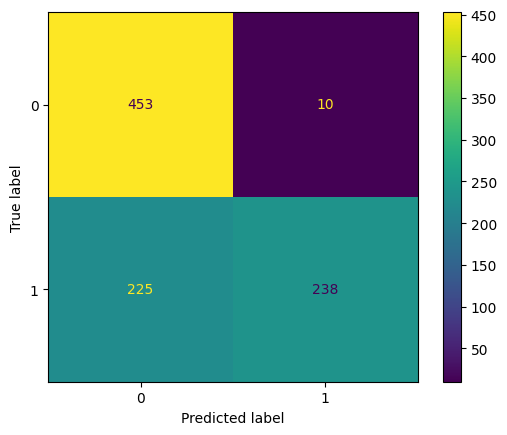

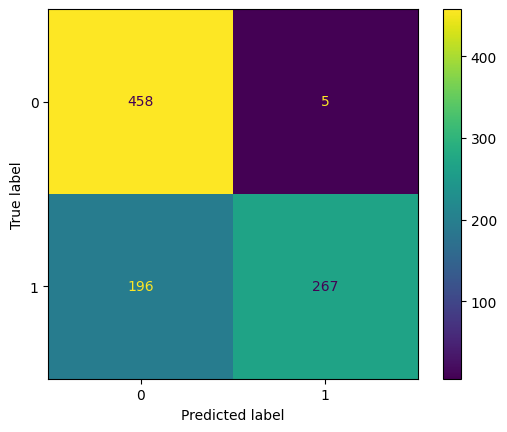

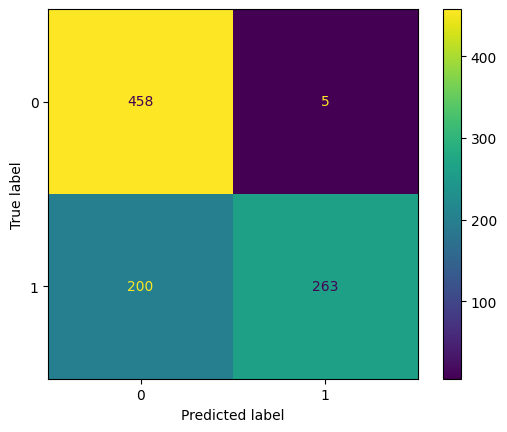

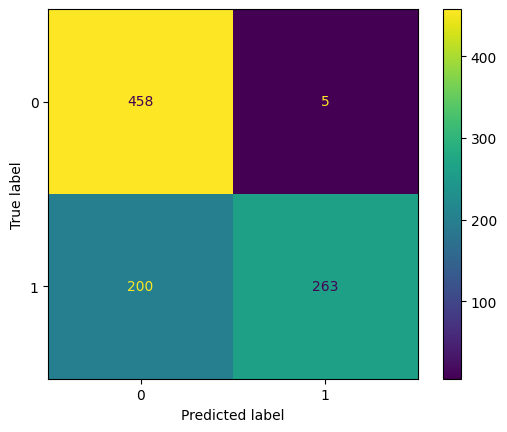

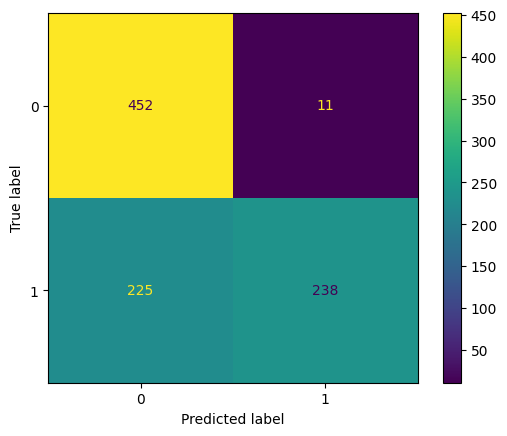

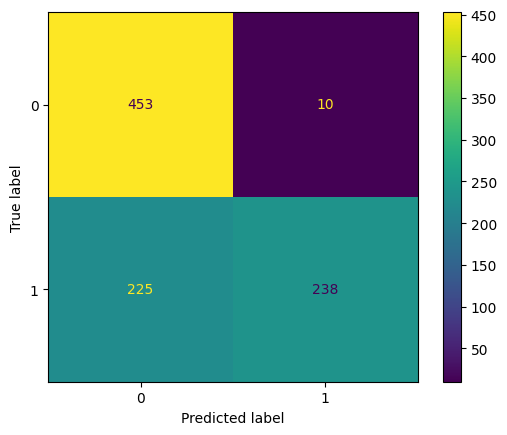

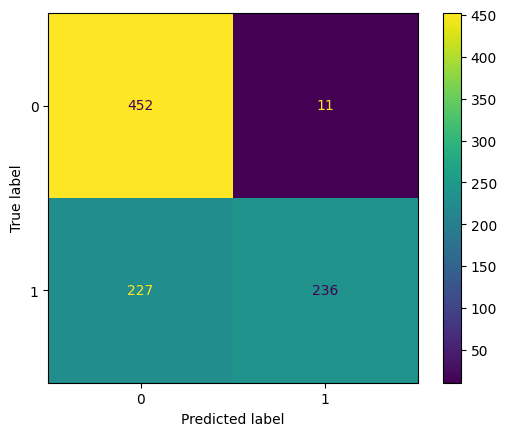

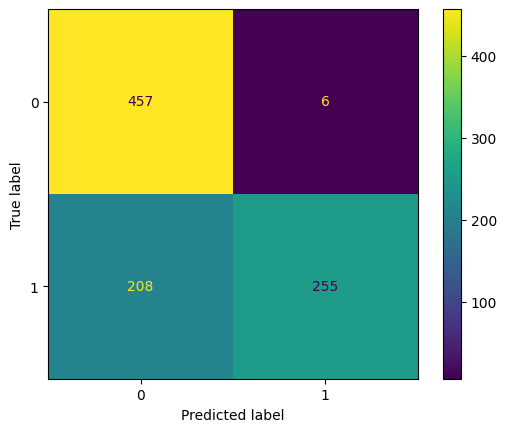

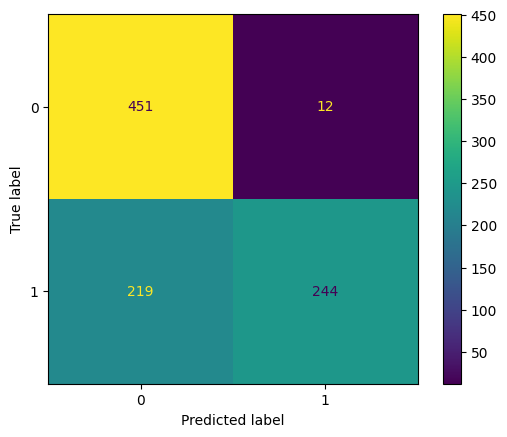

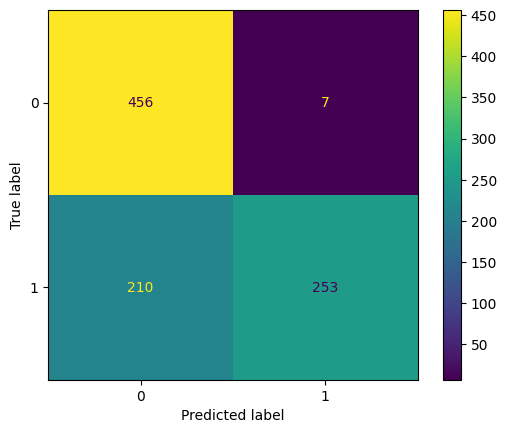

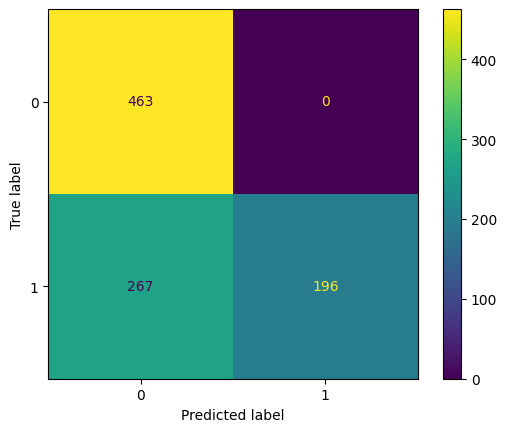

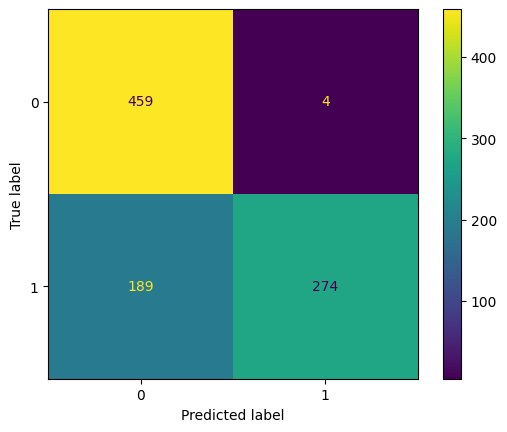

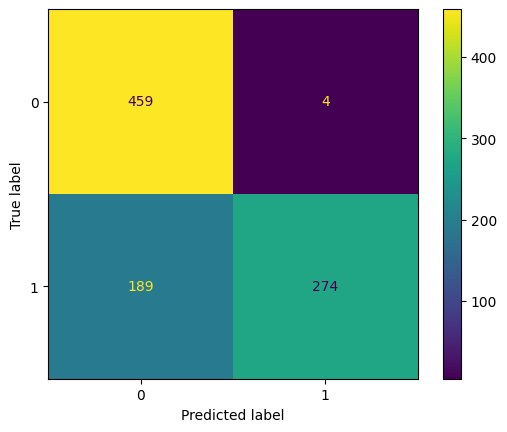

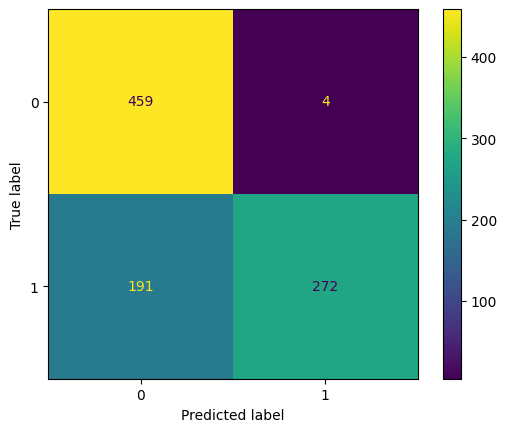

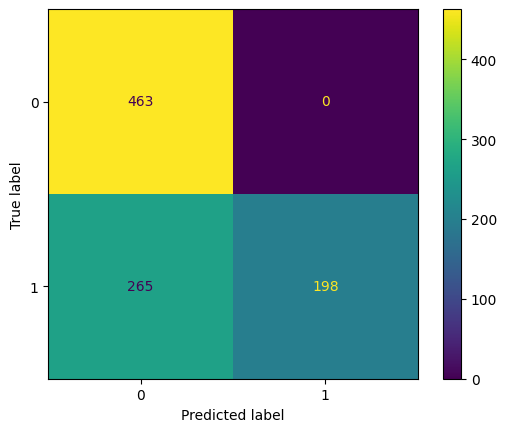

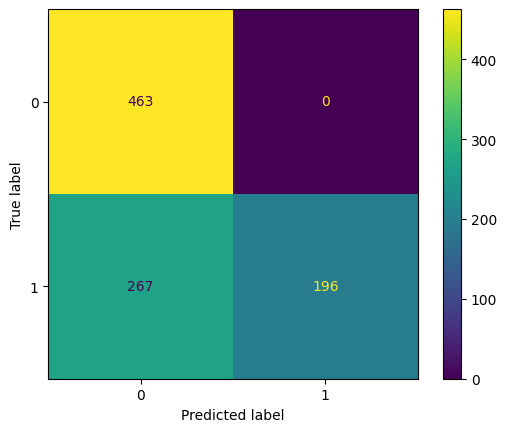

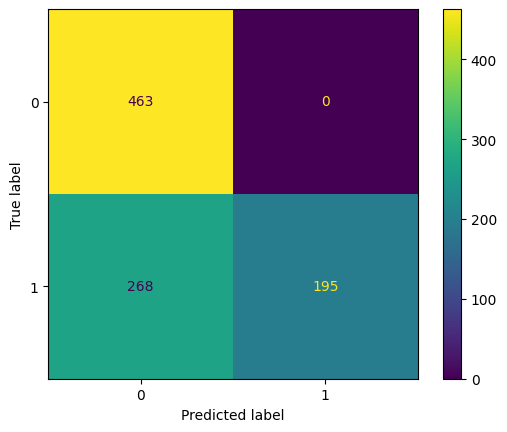

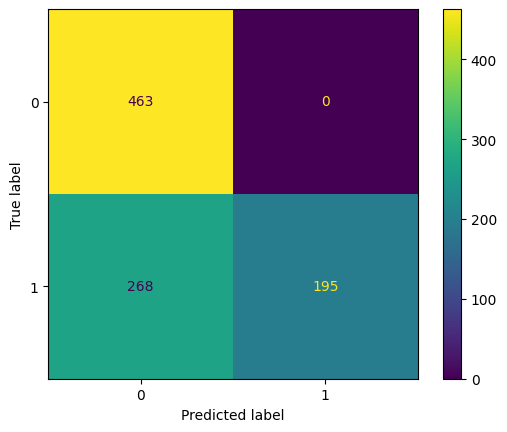

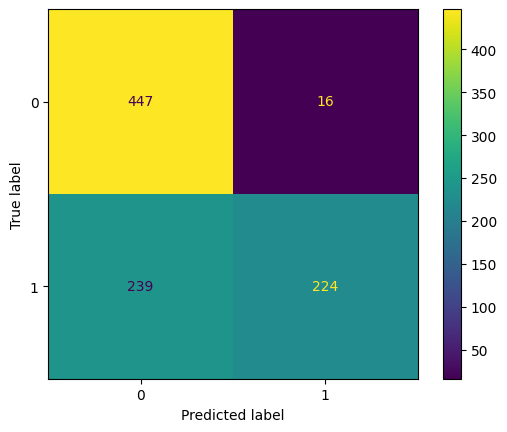

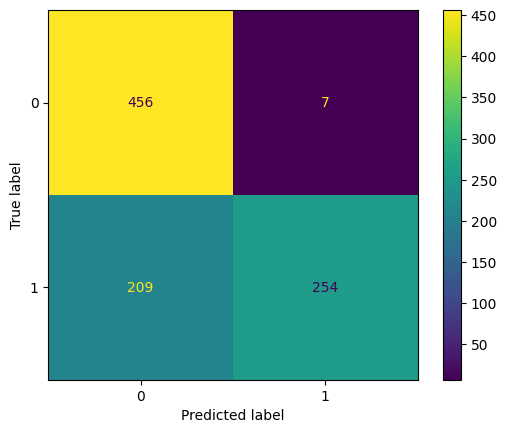

In [69]:
for c in [True, False]:
    for i in range(0, 10):
        run_name = 'elliptic_envelope_run%d_%d' % (int(c), i)
        params = {
            'assume_centered': c,
            'support_fraction': i / 10.0 if i != 0 else None,
            'contamination': 0.025,
        }
        launch_model(EllipticEnvelope, params, run_name)